In [33]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import re
from pandas.plotting import scatter_matrix
import time, warnings
import datetime as dt
import plotly.offline as py
import plotly.graph_objs as go
import os
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [34]:
Olist_db = pd.read_csv("C:/Users/Kaustubh/python/Olist_Master.csv")
Olist_db

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,customer_city,customer_state,customer_unique_id,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,Credit Card,2,...,Campos Dos Goytacazes,RJ,5ee8fe956c2631afc0a1dcc1920d0e3d,1,2017,9,2,8,Wed,Sep
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1,Boleto,1,...,Jatai,GO,8b3f917f4307d3e5cf34c0b43d6e6f50,3,2017,6,2,11,Wed,Jun
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1,Credit Card,2,...,Belo Horizonte,MG,69ba88e17ea574da9c9b8c8834a583d1,1,2018,5,4,10,Fri,May
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1,Credit Card,3,...,Sao Jose Dos Pinhais,PR,cbe063493a222cb17024ff0285b4ecb6,3,2017,8,1,18,Tue,Aug
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1,Credit Card,4,...,Conselheiro Lafaiete,MG,ffab5330bd7b40979ab6726b2e02292e,3,2017,8,3,21,Thu,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.9,16.14,1,Boleto,1,...,Rio De Janeiro,RJ,e060eb8f37de232154b24bbb2413b68e,1,2017,4,2,10,Wed,Apr
116577,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.0,16.21,1,Boleto,1,...,Limeira,SP,3041f5d65c4fa516eed1325d7a8657af,1,2017,8,4,10,Fri,Aug
116578,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,1,Boleto,1,...,Vitoria,ES,57b628f46c00f9a7358e5e875d5b4dd0,0,2018,7,2,18,Wed,Jul
116579,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44,1,Credit Card,1,...,Cacapava,SP,ea4d52b176423e61a84052b0f4717be9,3,2018,4,3,19,Thu,Apr


In [35]:
features = ['order_id', 'order_status', 'order_purchase_timestamp',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state']
Olist_db = Olist_db[features]
Olist_db.shape

(116581, 8)

In [36]:
df = Olist_db.copy()
Olist_db['order_purchase_date'] = Olist_db.order_purchase_timestamp.apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d"))

<ipython-input-36-70450e0794d2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
Olist_db = Olist_db.drop_duplicates()

In [38]:
cond = Olist_db["order_status"] == "delivered"
Olist_db = Olist_db.loc[cond]

In [39]:
def clustering_customers(df, date_max, date_min=False, group_range_days=False):
    df = df.copy()

    if(date_min == False):
        cond_f = df["order_purchase_date"] <= pd.to_datetime(date_max)
    else:
        cond_1 = df["order_purchase_date"] <= pd.to_datetime(date_max)
        cond_2 = df["order_purchase_date"] >= pd.to_datetime(date_min)
        cond_f = cond_1 & cond_2

    df = df.loc[cond_f]

    df["today"] = df["order_purchase_date"].max()

    df["today"] = df["today"].dt.date
    df["today"] = pd.to_datetime(df["today"], format="%Y-%m-%d")

    df["order_purchase_days_since"] = df["today"]  - df["order_purchase_date"]
    df["order_purchase_days_since"] = df["order_purchase_days_since"].astype(str)
    df["order_purchase_days_since"] = df["order_purchase_days_since"].str.replace(r'\s+days.*', '', regex=True)
    df["order_purchase_days_since"] = df["order_purchase_days_since"].astype(int)
    df["order_purchase_year"] = df["order_purchase_date"].dt.year

    agg_group = {
        "order_purchase_days_since": ["min", "max", "count"],
        "payment_value": ["sum","mean"]
    }

    df_group = df.groupby(["customer_unique_id"]).agg(agg_group).reset_index()

    df_group.columns = [' '.join(col).strip() for col in df_group.columns.values]

    columns_rename = {
        "order_purchase_days_since min": "first_order_purchase",
        "order_purchase_days_since max": "last_order_purchase",
        "order_purchase_days_since count": "order_purchase_qty",
        "payment_value mean": "payment_value_mean",
        "payment_value sum": "payment_value_sum"
    }

    df_group.rename(columns_rename, axis=1, inplace=True)

    median_payment = df_group["payment_value_mean"].median()

    if(group_range_days == False):
        major_group = 4
        range_days = str(df["order_purchase_date"].max() - df["order_purchase_date"].min()) 
        group_range_days = int(re.sub(r'\s+days.*', '', range_days))/major_group

    cond_payment_zero = df_group['payment_value_mean'] == 0.0

    cond_inactive_1 = df_group['last_order_purchase'] > group_range_days*3
    cond_inactive = cond_inactive_1 | cond_payment_zero

    cond_cold_1 = df_group['last_order_purchase'] > group_range_days*2
    cond_cold_2 = df_group['last_order_purchase'] <= group_range_days*3
    cond_cold = cond_cold_1 & cond_cold_2 & ~(cond_payment_zero)

    cond_hot_1 = df_group['last_order_purchase'] > group_range_days
    cond_hot_2 = df_group['last_order_purchase'] <= group_range_days*2
    cond_hot = cond_hot_1 & cond_hot_2 & ~(cond_payment_zero)

    cond_active_1 = df_group['last_order_purchase'] <= group_range_days
    cond_active = cond_active_1 & ~(cond_payment_zero)

    df_group.loc[cond_inactive, "segment"] = "inactive"
    df_group.loc[cond_cold, "segment"] = "cold"
    df_group.loc[cond_hot, "segment"] = "hot"
    df_group.loc[cond_active, "segment"] = "active"
    
    cond_hot_high_payment_1 = df_group["segment"] == "hot"
    cond_hot_high_payment_2 = df_group["payment_value_mean"] >= median_payment
    cond_hot_high_payment = cond_hot_high_payment_1 & cond_hot_high_payment_2
    
    cond_hot_low_payment_1 = df_group["segment"] == "hot"
    cond_hot_low_payment_2 = df_group["payment_value_mean"] < median_payment
    cond_hot_low_payment = cond_hot_low_payment_1 & cond_hot_low_payment_2
    
    cond_active_high_payment_1 = df_group["segment"] == "active"
    cond_active_high_payment_2 = df_group["payment_value_mean"] >= median_payment
    cond_active_high_payment = cond_active_high_payment_1 & cond_active_high_payment_2

    cond_active_low_payment_1 = df_group["segment"] == "active"
    cond_active_low_payment_2 = df_group["payment_value_mean"] < median_payment
    cond_active_low_payment = cond_active_low_payment_1 & cond_active_low_payment_2

    cond_cold_high_payment_1 = df_group["segment"] == "cold"
    cond_cold_high_payment_2 = df_group["payment_value_mean"] >= median_payment
    cond_cold_high_payment = cond_cold_high_payment_1 & cond_cold_high_payment_2

    cond_cold_low_payment_1 = df_group["segment"] == "cold"
    cond_cold_low_payment_2 = df_group["payment_value_mean"] < median_payment
    cond_cold_low_payment = cond_cold_low_payment_1 & cond_cold_low_payment_2

    df_group["sub_segment"] = "inactive"
    df_group.loc[cond_hot_high_payment, "sub_segment"] = "hot_high_payment_value"
    df_group.loc[cond_hot_low_payment, "sub_segment"] = "hot_low_payment_value"
    df_group.loc[cond_active_high_payment, "sub_segment"] = "active_high_payment_value"
    df_group.loc[cond_active_low_payment, "sub_segment"] = "active_low_payment_value"
    df_group.loc[cond_cold_high_payment, "sub_segment"] = "cold_high_payment_value"
    df_group.loc[cond_cold_low_payment, "sub_segment"] = "cold_low_payment_value"

    cond_new_customer = df_group["first_order_purchase"] <= group_range_days*2
    df_group["new_customer"] = 0
    df_group.loc[cond_new_customer, "new_customer"] = 1
    
    return group_range_days, df_group

In [40]:
period_2018, df_clustering_2018 = clustering_customers(Olist_db, "2018-12-31")
df_clustering_2018.head()

,customer_unique_id,first_order_purchase,last_order_purchase,order_purchase_qty,payment_value_sum,payment_value_mean,segment,sub_segment,new_customer
0,0000b849f77a49e4a4ce2b2a4ca5be3f,168,279,2,136.26,68.130000,hot,hot_low_payment_value,1
1,0000f46a3911fa3c0805444483337064,124,392,3,583.87,194.623333,cold,cold_high_payment_value,1
2,0004bd2a26a76fe21f786e4fbd80607f,6,443,3,336.11,112.036667,cold,cold_low_payment_value,1
3,00050ab1314c0e55a6ca13cf7181fecf,218,218,1,80.18,80.180000,hot,hot_low_payment_value,1
4,0005ef4cd20d2893f0d9fbd94d3c0d97,480,480,1,187.91,187.910000,cold,cold_high_payment_value,0


In [41]:
df_revenue_subsegment_2018 = df_clustering_2018.groupby(["sub_segment"]).agg({"payment_value_sum": "sum"}).reset_index()

configure_plotly_browser_state()
trace0 = go.Bar(
    x=df_revenue_subsegment_2018["sub_segment"].values,
    y=df_revenue_subsegment_2018["payment_value_sum"].values,
    marker=dict(
        color=['rgba(36,123,160,1)', 
               'rgba(75,147,177,1)',
               'rgba(112,193,179,1)', 
               'rgba(138,204,192,1)',
               'rgba(243,255,189,1)',
               'rgba(247,255,213,1)',
               'rgba(255,22,84,1)']),
)

data = [trace0]

layout = go.Layout(
    title='Revenue 2018',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [42]:
df_clustering_2018_qty = df_clustering_2018.loc[df_clustering_2018["order_purchase_qty"] > 1]

df_qty_subsegment_2018 = df_clustering_2018_qty.groupby(["sub_segment"]).agg({"order_purchase_qty": "count"}).reset_index()

In [43]:
configure_plotly_browser_state()
trace0 = go.Bar(
    x=df_qty_subsegment_2018["sub_segment"].values,
    y=df_qty_subsegment_2018["order_purchase_qty"].values,
    marker=dict(
        color=['rgba(36,123,160,1)', 
               'rgba(75,147,177,1)',
               'rgba(112,193,179,1)', 
               'rgba(138,204,192,1)',
               'rgba(243,255,189,1)',
               'rgba(247,255,213,1)',
               'rgba(255,22,84,1)']),
)

data = [trace0]

layout = go.Layout(
    title='Repurchase Amount 2018',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [44]:
df_days_repurchase_subsegment_2018 = df_clustering_2018_qty.groupby(["sub_segment"]).agg({"first_order_purchase": "mean", "last_order_purchase": "mean"}).reset_index()

df_days_repurchase_subsegment_2018["diff_order_purchase"] = df_days_repurchase_subsegment_2018["last_order_purchase"].values - df_days_repurchase_subsegment_2018["first_order_purchase"].values

df_days_repurchase_subsegment_2018["diff_order_purchase"] = df_days_repurchase_subsegment_2018["diff_order_purchase"].round(0)

In [45]:
configure_plotly_browser_state()
trace0 = go.Bar(
    x=df_days_repurchase_subsegment_2018["sub_segment"].values,
    y=df_days_repurchase_subsegment_2018["diff_order_purchase"].values,
    marker=dict(
        color=['rgba(36,123,160,1)', 
               'rgba(75,147,177,1)',
               'rgba(112,193,179,1)', 
               'rgba(138,204,192,1)',
               'rgba(243,255,189,1)',
               'rgba(247,255,213,1)',
               'rgba(255,22,84,1)']),
)

data = [trace0]

layout = go.Layout(
    title='Avg days between first and last purchase',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [46]:
period_2017, df_clustering_2017 = clustering_customers(Olist_db, "2017-12-31")

df_clustering_2017.head()

,customer_unique_id,first_order_purchase,last_order_purchase,order_purchase_qty,payment_value_sum,payment_value_mean,segment,sub_segment,new_customer
0,0000b849f77a49e4a4ce2b2a4ca5be3f,37,37,1,98.88,98.880,active,active_low_payment_value,1
1,0000f46a3911fa3c0805444483337064,107,150,2,255.25,127.625,hot,hot_high_payment_value,1
2,0004bd2a26a76fe21f786e4fbd80607f,201,201,1,45.77,45.770,hot,hot_low_payment_value,1
3,0005ef4cd20d2893f0d9fbd94d3c0d97,238,238,1,187.91,187.910,cold,cold_high_payment_value,0
4,000c8bdb58a29e7115cfc257230fb21b,325,325,1,441.33,441.330,cold,cold_high_payment_value,0


# RFM Modeling
Behavioral segmentation by 3 important features:
Recency — number of days since the last purchase
Frequency — number of transactions made over a given period
Monetary — amount spent over a given period of time

In [47]:
from datetime import timedelta, datetime
import squarify

In [48]:
Olist_db.columns

Index(['order_id', 'order_status', 'order_purchase_timestamp', 'payment_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_purchase_date'],
      dtype='object')

In [49]:
Olist_db['InvoiceDate'] = Olist_db.order_purchase_date.apply(lambda x : datetime.strftime(x, '%Y-%m-%d'))

In [50]:
Olist_db['InvoiceDate'] = pd.to_datetime(Olist_db['InvoiceDate'])

In [51]:
print('{:,} rows; {:,} columns'
      .format(Olist_db.shape[0], Olist_db.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(Olist_db[Olist_db.customer_unique_id.isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(Olist_db['InvoiceDate'].min(),
                                    Olist_db['InvoiceDate'].max()))

98,770 rows; 10 columns
0 transactions don't have a customer id
Transactions timeframe from 2016-10-03 00:00:00 to 2018-08-29 00:00:00


In [52]:
# Create snapshot date
snapshot_date = Olist_db['InvoiceDate'].max() + timedelta(days=1)
snapshot_date

Timestamp('2018-08-30 00:00:00')

In [53]:
# Grouping by CustomerID
data_process = Olist_db.groupby(['customer_unique_id']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'order_id': 'count',
        'payment_value': 'sum'})

In [54]:
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'order_id': 'Frequency',
                         'payment_value': 'Monetary'}, inplace=True)
data_process

,Recency,Frequency,Monetary
customer_unique_id,,,
0000b849f77a49e4a4ce2b2a4ca5be3f,170,2,136.26
0000f46a3911fa3c0805444483337064,126,3,583.87
0004bd2a26a76fe21f786e4fbd80607f,8,3,336.11
00050ab1314c0e55a6ca13cf7181fecf,220,1,80.18
0005ef4cd20d2893f0d9fbd94d3c0d97,482,1,187.91
...,...,...,...
fffa431dd3fcdefea4b1777d114144f2,163,3,1643.43
fffb09418989a0dbff854a28163e47c6,294,1,329.38
fffbf87b7a1a6fa8b03f081c5f51a201,52,2,199.50


# Great, we have 41,431 customer records grouped by recency of their purchase, the frequency by their quantity, and the monetary value of the purchases. Now we can get into the meat of things and use the .qcut() method to assign the relative percentile to their RFM features. But before that, let’s examine the distribution of our Recency, Frequency, and Monetary.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



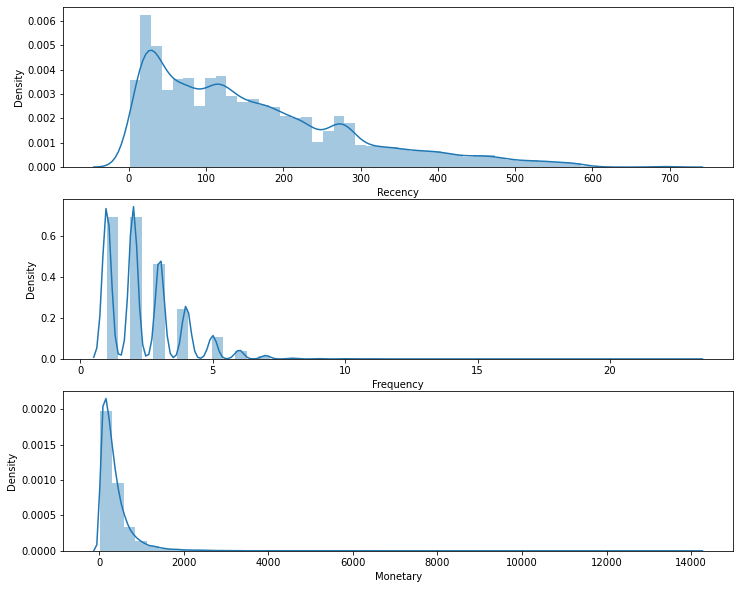

In [55]:
plt.figure(figsize=(12,10))
# Plot distribution of Recency
plt.subplot(3, 1, 1)
sns.distplot(data_process['Recency'])
# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.distplot(data_process['Frequency'])
# Plot distribution of Monetary
plt.subplot(3, 1, 3)
sns.distplot(data_process['Monetary'])
# Show the plot
plt.show()

In [56]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 4)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels, duplicates='drop')
# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)
data_process.head()

,Recency,Frequency,Monetary,R,F
customer_unique_id,,,,,
0000b849f77a49e4a4ce2b2a4ca5be3f,170,2,136.26,2,1
0000f46a3911fa3c0805444483337064,126,3,583.87,3,2
0004bd2a26a76fe21f786e4fbd80607f,8,3,336.11,4,2
00050ab1314c0e55a6ca13cf7181fecf,220,1,80.18,2,1
0005ef4cd20d2893f0d9fbd94d3c0d97,482,1,187.91,1,1


In [57]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['Monetary'], q=4, labels=m_labels)
# Create new column M
data_process = data_process.assign(M = m_groups.values)

In [58]:
data_process

,Recency,Frequency,Monetary,R,F,M
customer_unique_id,,,,,,
0000b849f77a49e4a4ce2b2a4ca5be3f,170,2,136.26,2,1,2
0000f46a3911fa3c0805444483337064,126,3,583.87,3,2,4
0004bd2a26a76fe21f786e4fbd80607f,8,3,336.11,4,2,3
00050ab1314c0e55a6ca13cf7181fecf,220,1,80.18,2,1,1
0005ef4cd20d2893f0d9fbd94d3c0d97,482,1,187.91,1,1,2
...,...,...,...,...,...,...
fffa431dd3fcdefea4b1777d114144f2,163,3,1643.43,2,2,4
fffb09418989a0dbff854a28163e47c6,294,1,329.38,1,1,3
fffbf87b7a1a6fa8b03f081c5f51a201,52,2,199.50,4,1,2


# with these 3 scores in place, R, F, and M, we can create our first RFM segment by concatenating the values together below

In [65]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M'])

data_process['RFM_Segment'] = data_process.apply(join_rfm, axis=1)
rfm = data_process
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
customer_unique_id,,,,,,,,
0000b849f77a49e4a4ce2b2a4ca5be3f,170,2,136.26,2,1,2,212,5
0000f46a3911fa3c0805444483337064,126,3,583.87,3,2,4,324,9
0004bd2a26a76fe21f786e4fbd80607f,8,3,336.11,4,2,3,423,9
00050ab1314c0e55a6ca13cf7181fecf,220,1,80.18,2,1,1,211,4
0005ef4cd20d2893f0d9fbd94d3c0d97,482,1,187.91,1,1,2,112,4


In [66]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique.sum())

48


In [67]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

customer_unique_id
0000b849f77a49e4a4ce2b2a4ca5be3f    5
0000f46a3911fa3c0805444483337064    9
0004bd2a26a76fe21f786e4fbd80607f    9
00050ab1314c0e55a6ca13cf7181fecf    4
0005ef4cd20d2893f0d9fbd94d3c0d97    4
Name: RFM_Score, dtype: int64


# Segmentation using RFM Analysis | Identify Upselling and Cross selling opportunities

In [68]:
# Define rfm_level function
def rfm_level(df):
    if (df['RFM_Segment'] >= 434 or (df['RFM_Score'] >= 9)) :
        return 'VVIP - Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['M'] == 4)):
        return 'Champions Big Spenders'
    elif ((df['RFM_Score'] >= 6) and (df['F'] >= 2)):
        return 'Loyal Customers'
    elif ((df['RFM_Segment'] >= 221) or (df['RFM_Score'] >= 6)):
        return 'Potential Loyalists'
    elif (((df['RFM_Segment'] >= 121) and (df['R'] == 1)) or df['RFM_Score'] == 5):
        return 'Needs Attention'
    elif ((df['RFM_Score'] >= 4) and (df['R'] == 1)):
        return 'Hibernating - Almost Lost'
    else:
        return 'Lost Customers'

In [69]:
# Define rfm_level function
def rfm_action(df):
    if (df['RFM_Segment'] >= 434 or (df['RFM_Score'] >= 9)) :
        return 'No Price Incentives; Offer Limited edition and Loyality programs'
    elif ((df['RFM_Score'] >= 8) and (df['M'] == 4)):
        return 'Upsell most expensive items'
    elif ((df['RFM_Score'] >= 6) and (df['F'] >= 2)):
        return 'Loyality programs;Cross Sell'
    elif ((df['RFM_Segment'] >= 221) or (df['RFM_Score'] >= 6)):
        return 'Cross Sell Recommendations and Discount coupons'
    elif (((df['RFM_Segment'] >= 121) and (df['R'] == 1)) or df['RFM_Score'] == 5):
        return 'Price incentives and Limited time offer'
    elif ((df['RFM_Score'] >= 4) and (df['R'] == 1)):
        return 'Aggressive price incentives'
    else:
        return 'Don\'t spend too much trying to re-acquire'

In [70]:
# Create a new variable RFM_Level
rfm['RFM_Segment'] = rfm.RFM_Segment.apply(lambda x: int(x))
rfm['Customer Segment'] = rfm.apply(rfm_level, axis=1)
# Create a new variable RFM_Level
rfm['Marketing Action'] = rfm.apply(rfm_action, axis=1)
rfm.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Customer Segment,Marketing Action
customer_unique_id,,,,,,,,,,
0000b849f77a49e4a4ce2b2a4ca5be3f,170,2,136.26,2,1,2,212,5,Needs Attention,Price incentives and Limited time offer
0000f46a3911fa3c0805444483337064,126,3,583.87,3,2,4,324,9,VVIP - Can't Loose Them,No Price Incentives; Offer Limited edition and...
0004bd2a26a76fe21f786e4fbd80607f,8,3,336.11,4,2,3,423,9,VVIP - Can't Loose Them,No Price Incentives; Offer Limited edition and...
00050ab1314c0e55a6ca13cf7181fecf,220,1,80.18,2,1,1,211,4,Lost Customers,Don't spend too much trying to re-acquire
0005ef4cd20d2893f0d9fbd94d3c0d97,482,1,187.91,1,1,2,112,4,Hibernating - Almost Lost,Aggressive price incentives
000949456b182f53c18b68d6babc79c1,106,1,116.90,3,1,1,311,5,Potential Loyalists,Cross Sell Recommendations and Discount coupons
000a5ad9c4601d2bbdd9ed765d5213b3,168,1,462.72,2,1,4,214,7,Potential Loyalists,Cross Sell Recommendations and Discount coupons
000c8bdb58a29e7115cfc257230fb21b,227,2,852.54,2,1,4,214,7,Potential Loyalists,Cross Sell Recommendations and Discount coupons
000de6019bb59f34c099a907c151d855,24,1,96.66,4,1,1,411,6,Potential Loyalists,Cross Sell Recommendations and Discount coupons


# Group Customer by their Customer Segment

In [71]:
# Calculate average values for each Customer Segment, and return a size of each segment 
rfm_level_agg = rfm.groupby('Customer Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'],
    'Marketing Action': 'unique'
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                          Recency Frequency Monetary         \
                             mean      mean     mean  count   
Customer Segment                                              
Champions Big Spenders      160.5       2.8    816.2   1563   
Hibernating - Almost Lost   349.1       1.4    188.0   2541   
Lost Customers              298.5       1.2     78.2   6856   
Loyal Customers             148.6       3.2    319.8   5335   
Needs Attention             245.6       1.8    241.5   3735   
Potential Loyalists         102.8       1.6    279.4  11492   
VVIP - Can't Loose Them      61.6       4.0    716.5   9909   

                                                            Marketing Action  
                                                                      unique  
Customer Segment                                                              
Champions Big Spenders                         [Upsell most expensive items]  
Hibernating - Almost Lost                      [Aggre

In [72]:
rfm_level_ag = pd.DataFrame(rfm_level_agg)
rfm_level_ag = rfm_level_ag.reset_index()
rfm_level_ag

Customer Segment Recency Frequency Monetary         \
                                mean      mean     mean  count   
0     Champions Big Spenders   160.5       2.8    816.2   1563   
1  Hibernating - Almost Lost   349.1       1.4    188.0   2541   
2             Lost Customers   298.5       1.2     78.2   6856   
3            Loyal Customers   148.6       3.2    319.8   5335   
4            Needs Attention   245.6       1.8    241.5   3735   
5        Potential Loyalists   102.8       1.6    279.4  11492   
6    VVIP - Can't Loose Them    61.6       4.0    716.5   9909   

                                    Marketing Action  
                                              unique  
0                      [Upsell most expensive items]  
1                      [Aggressive price incentives]  
2        [Don't spend too much trying to re-acquire]  
3                     [Loyality programs;Cross Sell]  
4          [Price incentives and Limited time offer]  
5  [Cross Sell Recommendations and Discount coupons]  
6  [No Price Incentives; Offer Limited edition an...

From here, we can see that a sufficient percentage (~45%) of our customers are in the top tier RFM levels. Olist must be doing something right to be maintaining their loyalty! The other 55% will need some work.

1. Potential Loyalists —
High potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!

2. Needs Attention —
Showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount.

3. Hibernating Almost Lost —
Made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.

4. Lost Customers —
Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

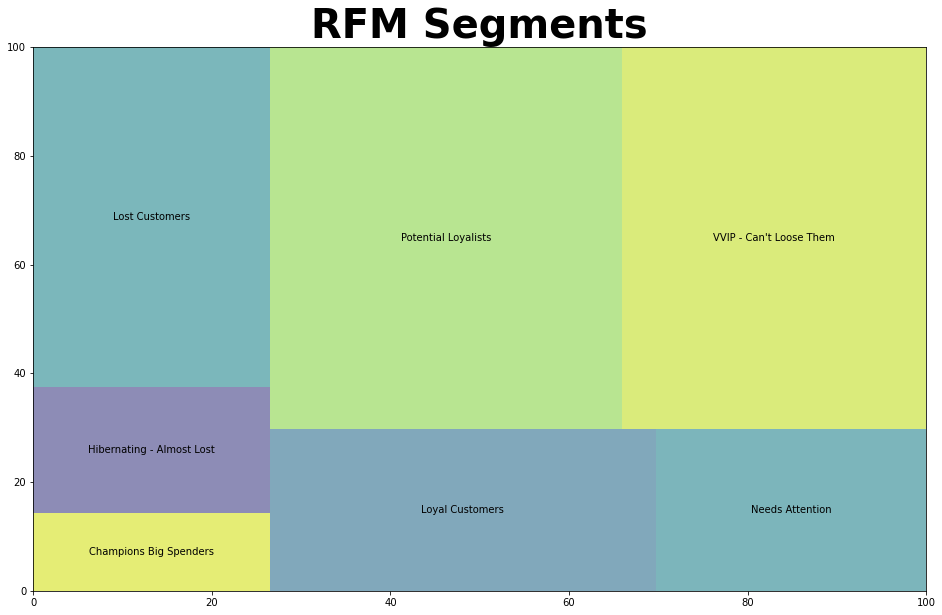

In [73]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count', 'MarketingAction']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Champions Big Spenders',
                     'Hibernating - Almost Lost',
                     'Lost Customers',
                     'Loyal Customers',
                     'Needs Attention',
                     'Potential Loyalists',
                     'VVIP - Can\'t Loose Them'], alpha=.6 )
plt.title("RFM Segments",fontsize=40,fontweight="bold")
plt.axis('on')
plt.show()

In [74]:
rfm_level_ag

Customer Segment Recency Frequency Monetary         \
                                mean      mean     mean  count   
0     Champions Big Spenders   160.5       2.8    816.2   1563   
1  Hibernating - Almost Lost   349.1       1.4    188.0   2541   
2             Lost Customers   298.5       1.2     78.2   6856   
3            Loyal Customers   148.6       3.2    319.8   5335   
4            Needs Attention   245.6       1.8    241.5   3735   
5        Potential Loyalists   102.8       1.6    279.4  11492   
6    VVIP - Can't Loose Them    61.6       4.0    716.5   9909   

                                    Marketing Action  
                                              unique  
0                      [Upsell most expensive items]  
1                      [Aggressive price incentives]  
2        [Don't spend too much trying to re-acquire]  
3                     [Loyality programs;Cross Sell]  
4          [Price incentives and Limited time offer]  
5  [Cross Sell Recommendations and Discount coupons]  
6  [No Price Incentives; Offer Limited edition an...

# Interactive Chart for Visualising Customer Segments

In [75]:
import plotly.graph_objects as go

fig =go.Figure(go.Treemap(
    labels = rfm_level_ag['Customer Segment'],
    parents = ['Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation'],   #rfm_level_ag[('Marketing Action', 'unique')].tolist(), 
    values= rfm_level_ag[('Monetary', 'count')]
))

fig.show()

# K-Means Clustering

In [76]:
data_rfm = rfm[['Recency', 'Frequency', 'Monetary']]
data_rfm.min()

Recency      1.00
Frequency    1.00
Monetary     9.59
dtype: float64

In [77]:
import numpy as np
from sklearn.preprocessing import StandardScaler

data_log = np.log(data_rfm)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data=data_normalized, index=data_rfm.index, columns=data_rfm.columns)

In [78]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
data_rfm_k5 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k5.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0          33.5       1.6    182.1   4668
1         276.3       1.0    109.0  10121
2         198.4       2.1    282.6  11910
3         139.8       3.7    708.9   8656
4          26.4       3.8    617.7   6076

In [79]:
sse = {}
for k in range(1, 8):  
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_
plt.figure(figsize=(18,9))

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
data_rfm_k4 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k4.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0          77.4       4.2    788.9   9284
1         262.3       1.1    113.9  11325
2          27.6       2.2    255.5   6336
3         194.8       2.4    343.5  14486

In [ ]:
data_melt = pd.melt(
                    data_rfm_k4.reset_index(),               
                    id_vars=['customer_unique_id', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'], 
                    var_name='Metric', value_name='Value'
                    )
data_melt.head(10)

,customer_unique_id,Cluster,Metric,Value
0,0000b849f77a49e4a4ce2b2a4ca5be3f,3,Recency,170.0
1,0000f46a3911fa3c0805444483337064,0,Recency,126.0
2,0004bd2a26a76fe21f786e4fbd80607f,2,Recency,8.0
3,00050ab1314c0e55a6ca13cf7181fecf,1,Recency,220.0
4,0005ef4cd20d2893f0d9fbd94d3c0d97,1,Recency,482.0
5,000949456b182f53c18b68d6babc79c1,1,Recency,106.0
6,000a5ad9c4601d2bbdd9ed765d5213b3,3,Recency,168.0
7,000c8bdb58a29e7115cfc257230fb21b,3,Recency,227.0
8,000de6019bb59f34c099a907c151d855,2,Recency,24.0
9,000ec5bff359e1c0ad76a81a45cb598f,2,Recency,53.0


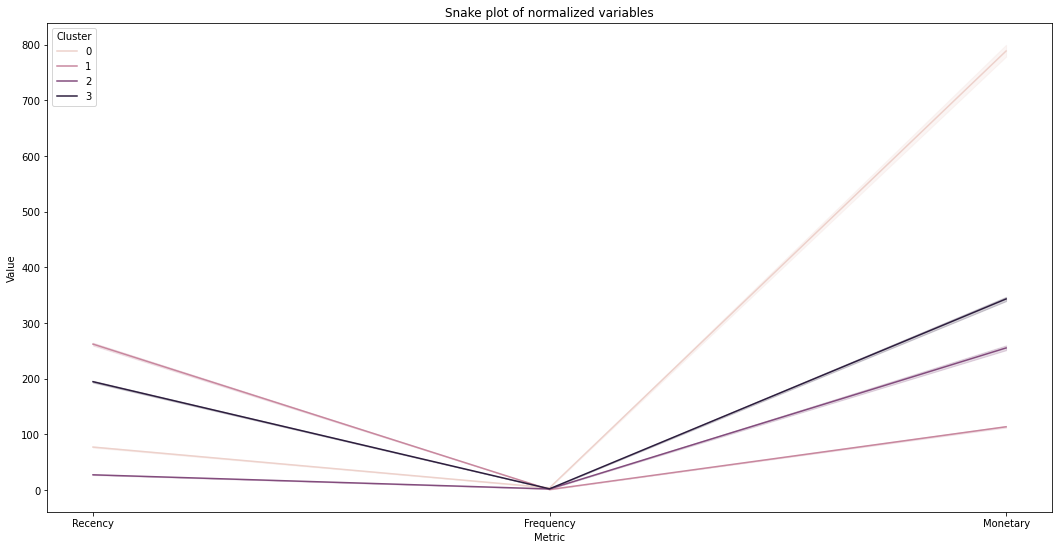

In [ ]:
# Snake Plot
plt.figure(figsize = (18,9))
plt.title('Snake plot of normalized variables')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.lineplot(data=data_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [ ]:
cluster_avg = data_rfm_k4.groupby(['Cluster']).mean() 
population_avg = data_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,-0.52,0.75,1.15
1,0.63,-0.55,-0.69
2,-0.83,-0.10,-0.30
3,0.21,-0.01,-0.06


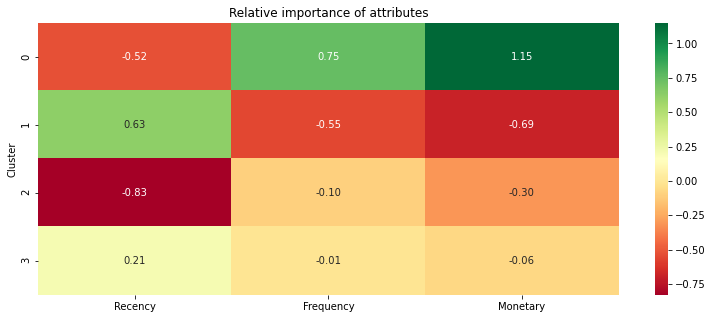

In [ ]:
plt.figure(figsize=(13, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

Relative Importance of RFM among K-Means Clusters
We can see that our grouped summary of the mean of R, F, M that each cluster of customers places a different emphasis on our 4 features:

Cluster 0
It has the highest MontaryValue mean and low Recency mean and the highest frequency mean — This is our ideal customer segment

Cluster 1
It performs poorly across R, F, and M. we will need to design campaigns to activate them again.

Cluster 2
They shopped with us recently but have not spend as much or as frequently as we would like them to — perhaps some personalization of products targeted at them can help to maximize their lifetime-value and come back to purchase?

Cluster 3
It has spent quite a fair amount with us but has not shopped with us in the 3–4 months — We will need to do something before we lose them!